In [1]:
##conda install geopandas

In [2]:
import pandas as pd # Library for data handling
import numpy as np # matrix operations
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (30, 20)

# ETL (Extract, Transform, Load)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ruhidm/Palette_Training_5/main/rm_crop_yields_1938_2021.csv')

In [4]:
data = df.copy()

In [5]:
data.head()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,1,NaN,NaN,4.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN
1,1939,1,NaN,NaN,9.0,NaN,NaN,NaN,16.0,NaN,NaN,16.0,NaN,NaN,NaN,NaN,0.0,NaN
2,1940,1,NaN,NaN,12.0,NaN,NaN,NaN,23.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,8.0,NaN
3,1941,1,NaN,NaN,18.0,NaN,NaN,NaN,32.0,NaN,NaN,28.0,NaN,NaN,NaN,NaN,5.0,NaN
4,1942,1,NaN,NaN,20.0,NaN,NaN,NaN,35.0,NaN,NaN,28.0,14.0,NaN,NaN,NaN,5.0,NaN


In [6]:
data.tail()

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
25012,2017,622,NaN,43.06,59.49,NaN,NaN,NaN,93.01,NaN,43.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25013,2018,622,NaN,39.30,59.50,NaN,NaN,NaN,96.40,NaN,43.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN
25014,2019,622,NaN,46.10,63.90,NaN,NaN,NaN,106.00,NaN,33.7,73.9,NaN,NaN,NaN,NaN,NaN,NaN
25015,2020,622,NaN,40.90,55.10,NaN,NaN,NaN,94.50,NaN,49.2,74.3,NaN,NaN,NaN,NaN,NaN,NaN
25016,2021,622,NaN,23.90,17.00,NaN,NaN,NaN,25.80,NaN,NaN,23.3,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25017 entries, 0 to 25016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25017 non-null  int64  
 1   RM            25017 non-null  int64  
 2   Winter Wheat  3037 non-null   float64
 3   Canola        14008 non-null  float64
 4   Spring Wheat  24924 non-null  float64
 5   Mustard       4487 non-null   float64
 6   Durum         11581 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          23913 non-null  float64
 9   Lentils       5515 non-null   float64
 10  Peas          8134 non-null   float64
 11  Barley        24703 non-null  float64
 12  Fall Rye      15847 non-null  float64
 13  Canary Seed   3819 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          20934 non-null  float64
 17  Chickpeas     960 non-null    float64
dtypes: float64(16), int64(2)
m

### Observation: ###

* There are **25017** observations and **18** columns.
* All columns are numerical.
* Almost all columns except '**Year**' and '**RM**' have Null values.


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,25017.0,1979.385938,24.221744,1938.0,1958.00,1979.0,2000.000,2021.00
RM,25017.0,248.957509,148.829628,1.0,124.00,247.0,370.000,622.00
Winter Wheat,3037.0,38.243500,12.207150,3.0,30.00,38.0,45.500,90.00
Canola,14008.0,24.146796,9.209177,0.0,18.00,23.0,29.200,59.50
Spring Wheat,24924.0,25.778733,11.153028,0.0,19.00,25.6,31.800,198.00
Mustard,4487.0,844.185955,275.700375,35.6,663.50,847.0,1000.945,2500.00
Durum,11581.0,29.024429,9.829962,0.0,23.00,28.2,34.300,85.37
Sunflowers,946.0,692.629915,555.776604,0.0,0.00,790.5,1100.000,2400.00
Oats,23913.0,47.104433,21.775369,0.0,33.00,46.0,59.000,165.10
Lentils,5515.0,1171.778849,408.937628,46.0,900.00,1166.0,1439.000,3411.00


In [9]:
data.isna().sum()

Year                0
RM                  0
Winter Wheat    21980
Canola          11009
Spring Wheat       93
Mustard         20530
Durum           13436
Sunflowers      24071
Oats             1104
Lentils         19502
Peas            16883
Barley            314
Fall Rye         9170
Canary Seed     21198
Spring Rye      24212
Tame Hay        20812
Flax             4083
Chickpeas       24057
dtype: int64

In [10]:
data[data['Canola'].notna()].describe().T

,count,mean,std,min,25%,50%,75%,max
Year,14008.0,1995.885280,15.569402,1938.0,1983.00,1997.00,2009.000,2021.00
RM,14008.0,268.782696,146.466353,1.0,151.00,277.00,382.000,622.00
Winter Wheat,2959.0,38.454718,12.155956,3.0,30.00,38.10,45.845,90.00
Canola,14008.0,24.146796,9.209177,0.0,18.00,23.00,29.200,59.50
Spring Wheat,13968.0,31.112114,10.257050,0.0,25.00,30.00,36.000,198.00
Mustard,4317.0,848.258147,274.521956,35.6,669.20,850.00,1004.000,2500.00
Durum,9761.0,29.777166,9.956887,0.0,24.00,29.00,35.000,85.37
Sunflowers,914.0,695.288731,560.411908,0.0,0.00,800.00,1102.750,2400.00
Oats,13108.0,57.394994,20.744146,0.0,45.00,55.00,67.500,165.10
Lentils,5287.0,1178.734365,406.962101,95.0,900.00,1174.56,1442.160,3411.00


In [11]:
data.rename(columns={'RM': 'RMNO'}, inplace=True)

In [12]:
data[data['RMNO'] == 100]

,Year,RMNO,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
4956,1938,100,NaN,NaN,6.00,NaN,NaN,NaN,16.0,NaN,NaN,14.00,NaN,NaN,NaN,NaN,NaN,NaN
4957,1939,100,NaN,NaN,8.00,NaN,NaN,NaN,12.0,NaN,NaN,15.00,NaN,NaN,NaN,NaN,NaN,NaN
4958,1940,100,NaN,NaN,9.00,NaN,NaN,NaN,14.0,NaN,NaN,11.00,NaN,NaN,NaN,NaN,NaN,NaN
4959,1941,100,NaN,NaN,9.00,NaN,NaN,NaN,17.0,NaN,NaN,24.00,NaN,NaN,NaN,NaN,3.00,NaN
4960,1942,100,NaN,NaN,29.00,NaN,NaN,NaN,55.0,NaN,NaN,39.00,23.0,NaN,NaN,NaN,6.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,2017,100,37.06,29.08,35.55,NaN,29.85,NaN,NaN,1270.15,20.6,48.06,NaN,NaN,NaN,NaN,13.65,1729.05
5036,2018,100,NaN,33.50,25.00,NaN,29.80,NaN,24.0,1160.00,25.0,44.00,NaN,NaN,NaN,NaN,12.00,1722.00
5037,2019,100,49.30,42.10,36.30,NaN,50.00,NaN,80.9,941.00,29.4,66.70,NaN,NaN,NaN,NaN,32.50,1759.00
5038,2020,100,NaN,41.20,43.80,NaN,54.50,NaN,NaN,1426.00,34.1,60.50,NaN,1766.0,NaN,NaN,31.00,668.00


In [13]:
cropCols = []
for col in data.columns:
    if col != 'Year' and col != 'RMNO':
        cropCols.append(col)
cropCols

['Winter Wheat',
 'Canola',
 'Spring Wheat',
 'Mustard',
 'Durum',
 'Sunflowers',
 'Oats',
 'Lentils',
 'Peas',
 'Barley',
 'Fall Rye',
 'Canary Seed',
 'Spring Rye',
 'Tame Hay',
 'Flax',
 'Chickpeas']

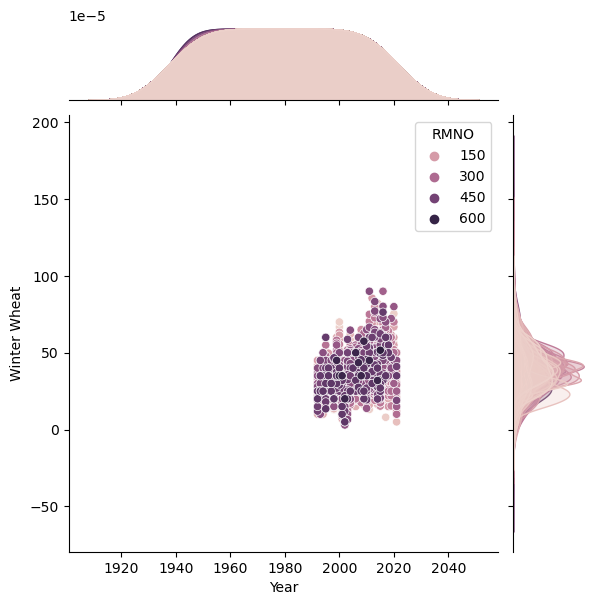

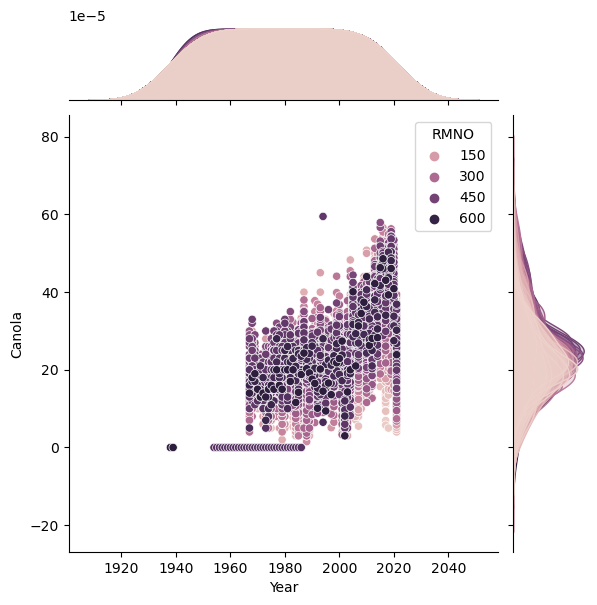

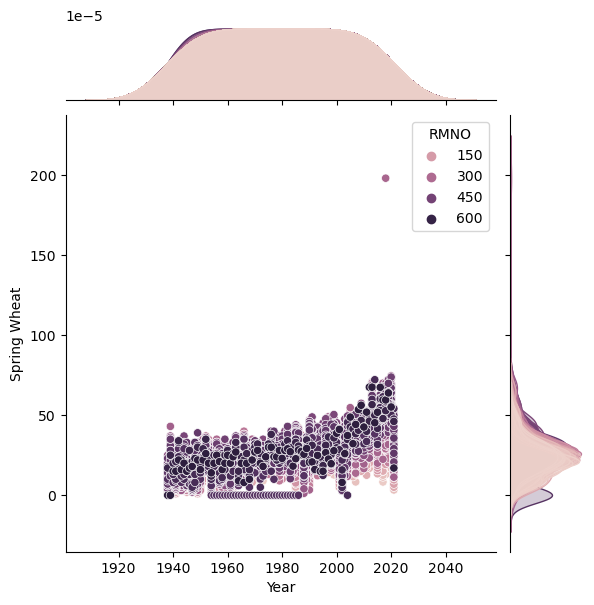

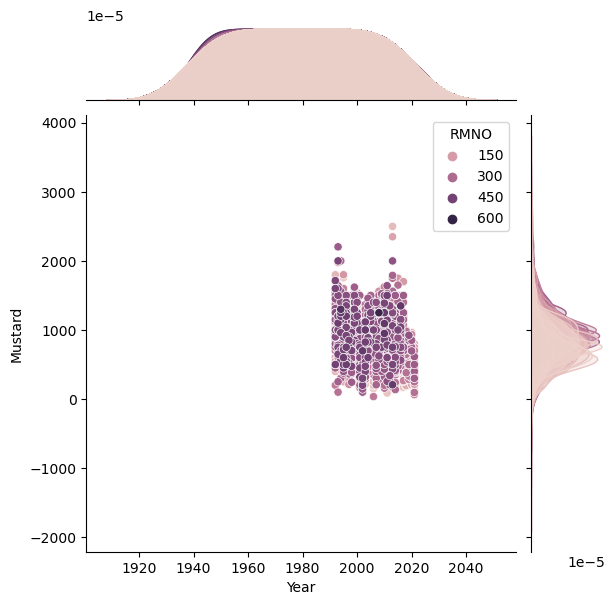

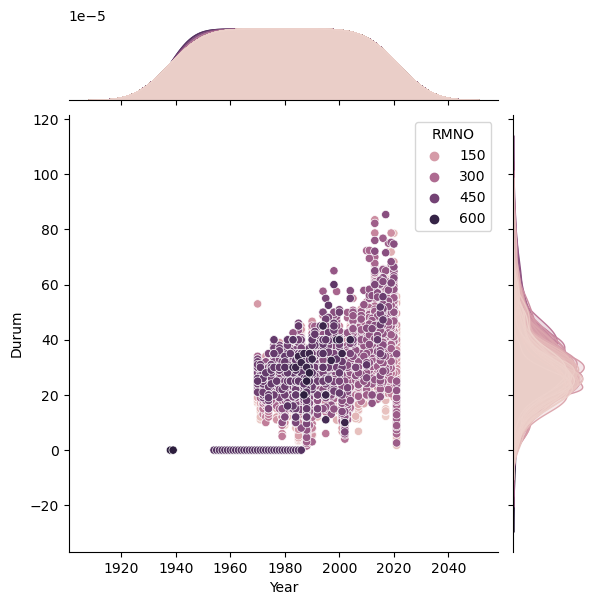

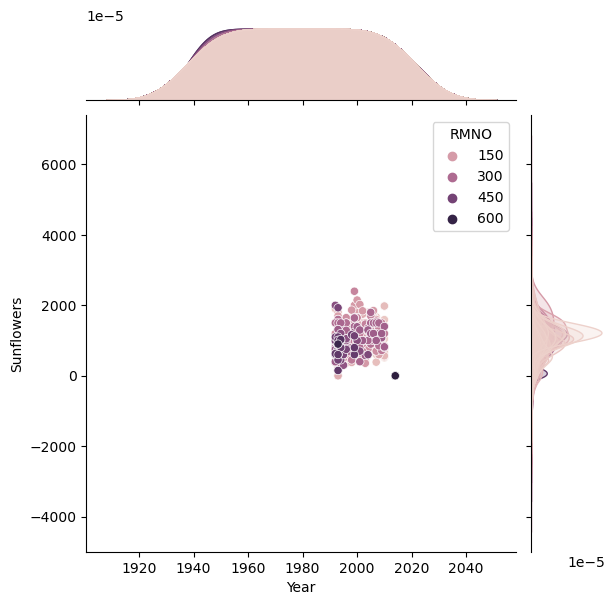

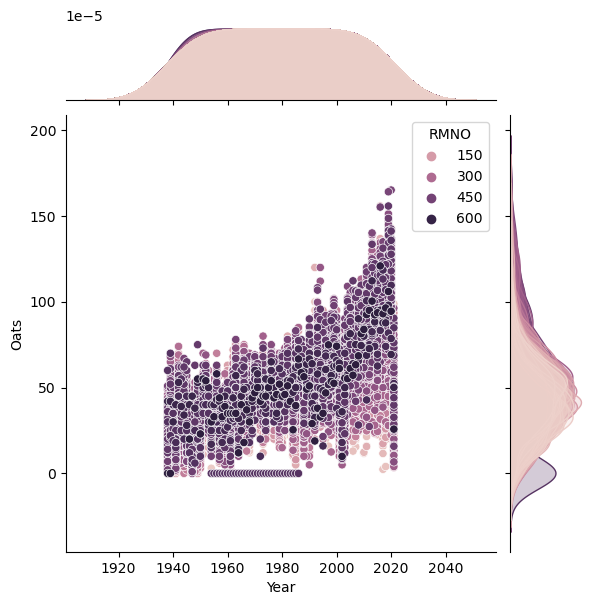

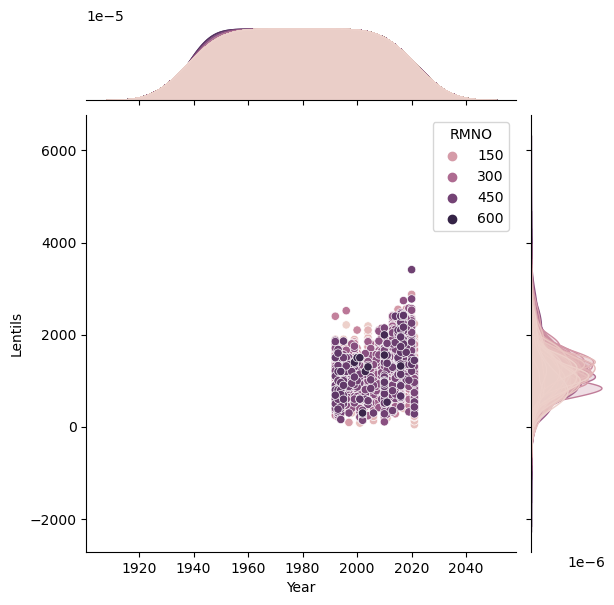

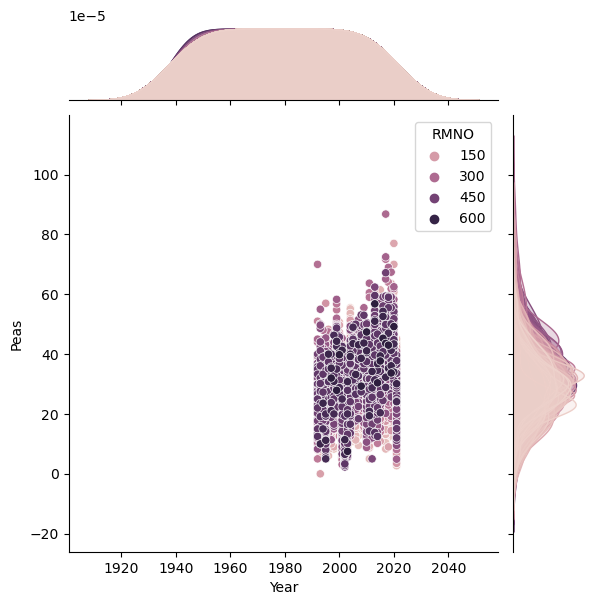

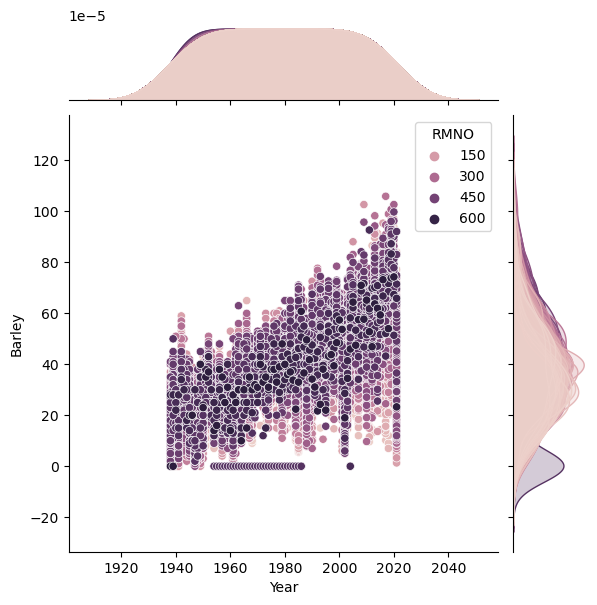

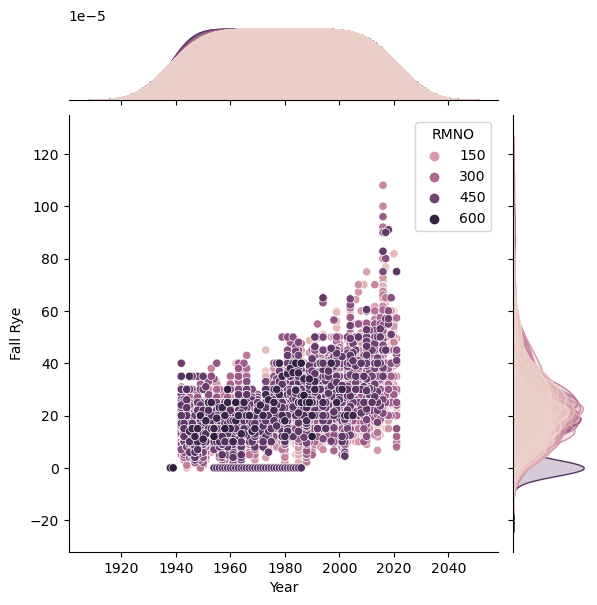

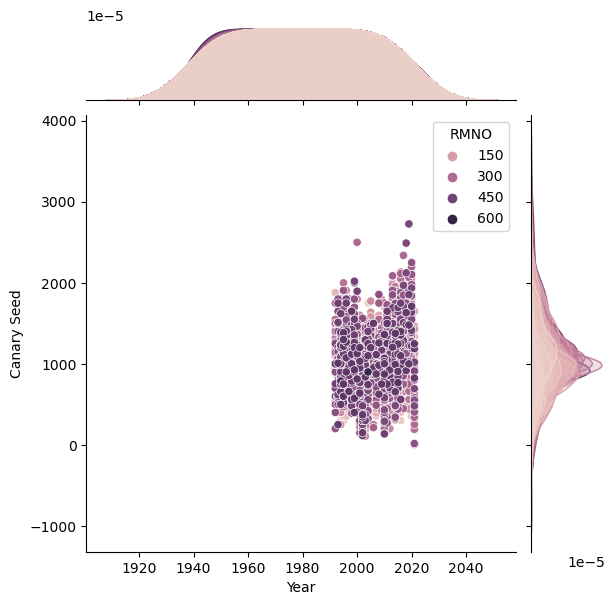

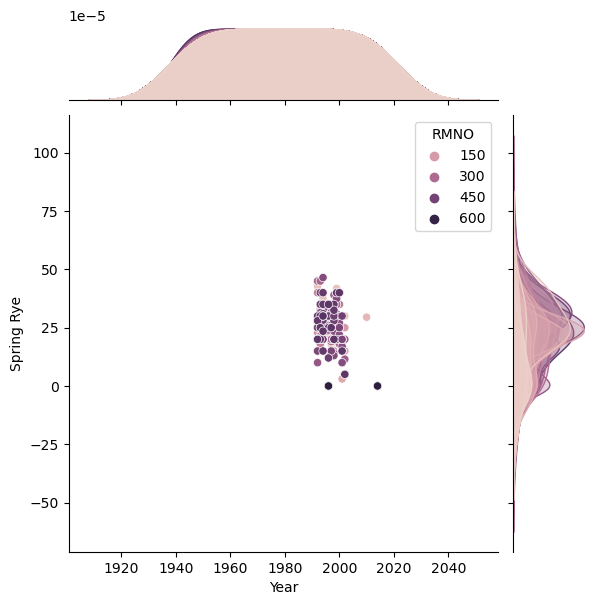

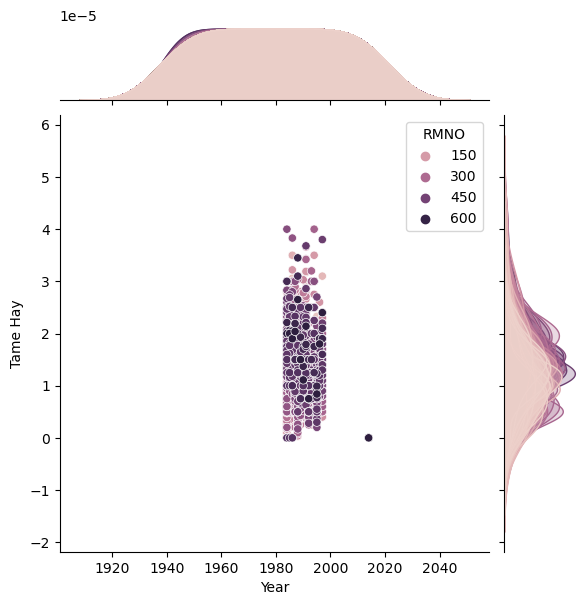

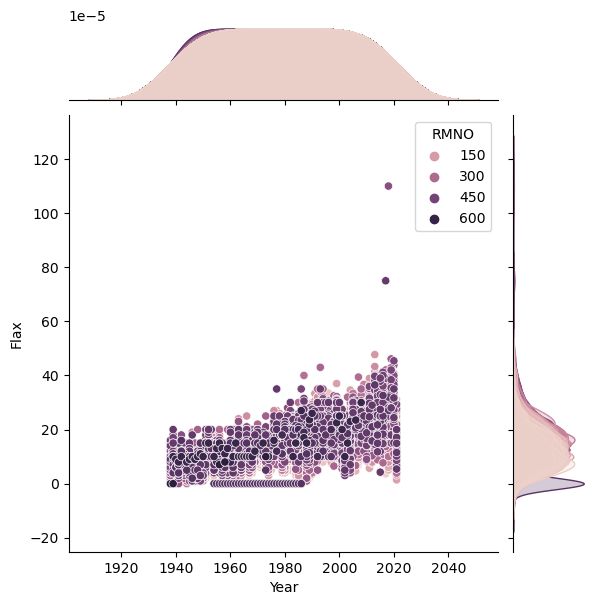

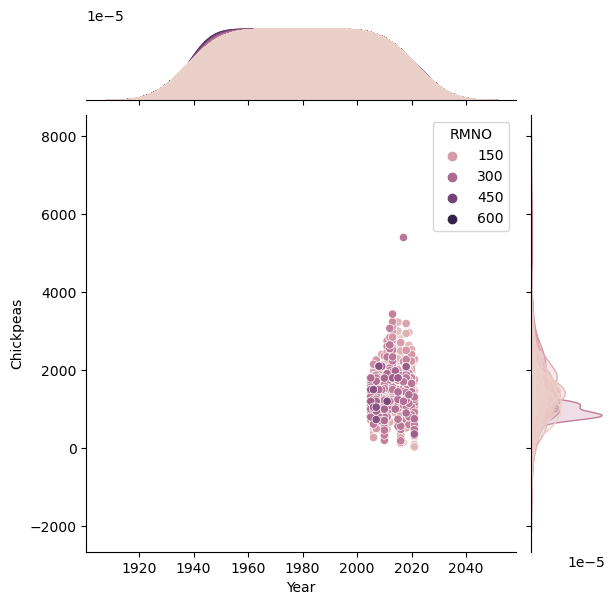

In [14]:
for col in cropCols:
    sns.jointplot(data=data[['Year', 'RMNO', col]], x='Year', y=col,  hue='RMNO')

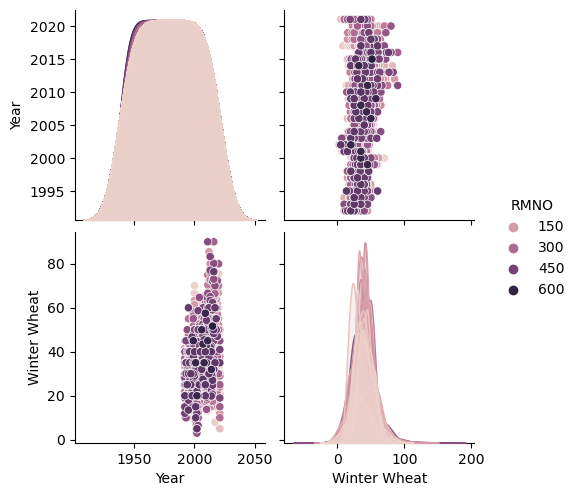

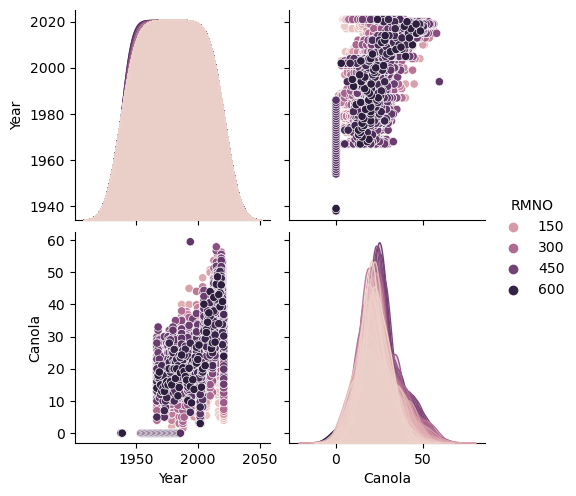

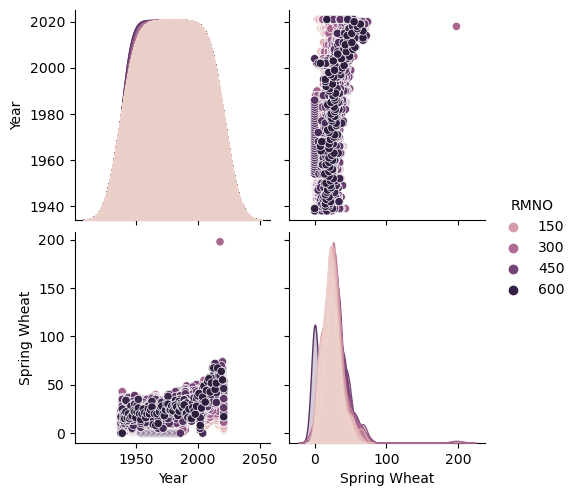

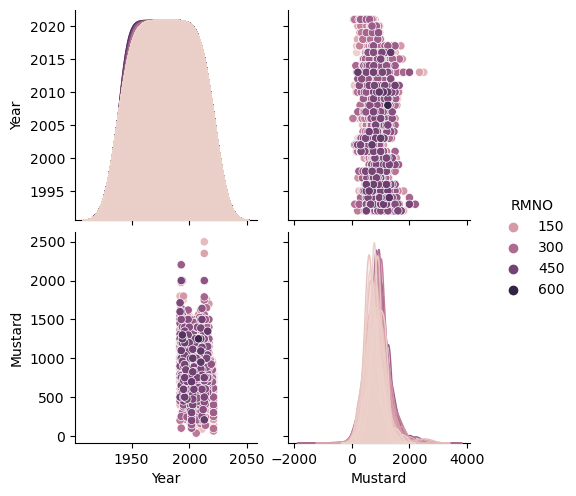

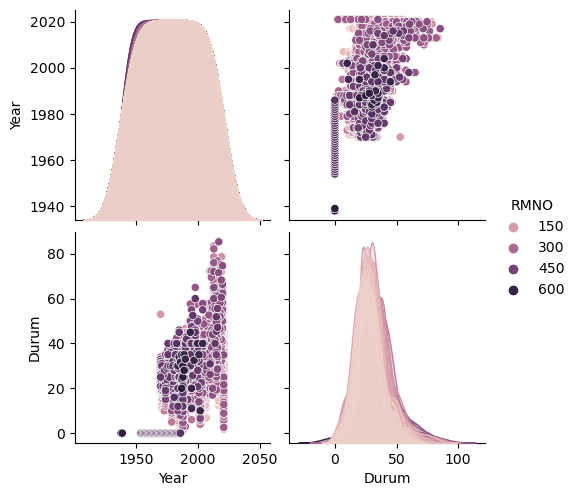

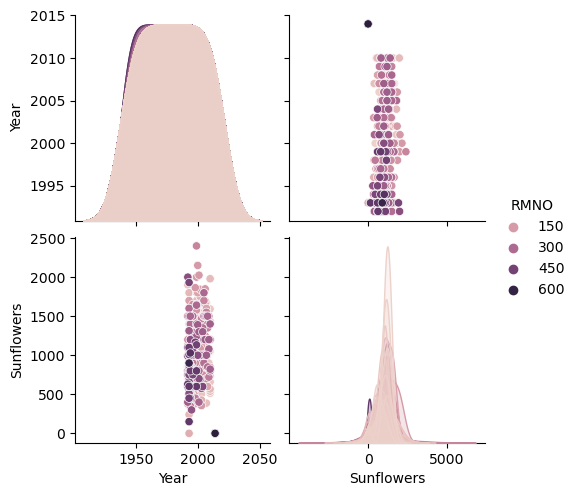

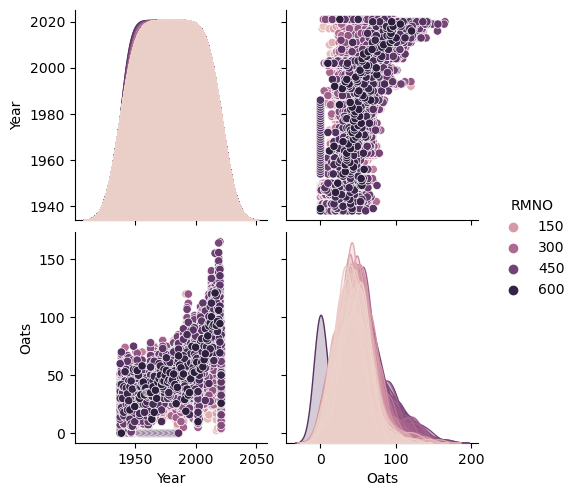

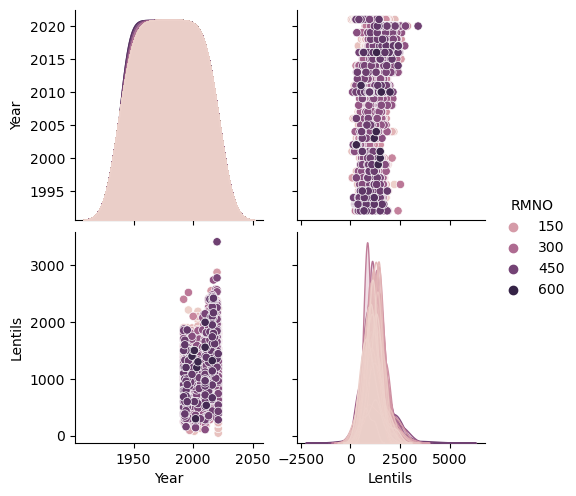

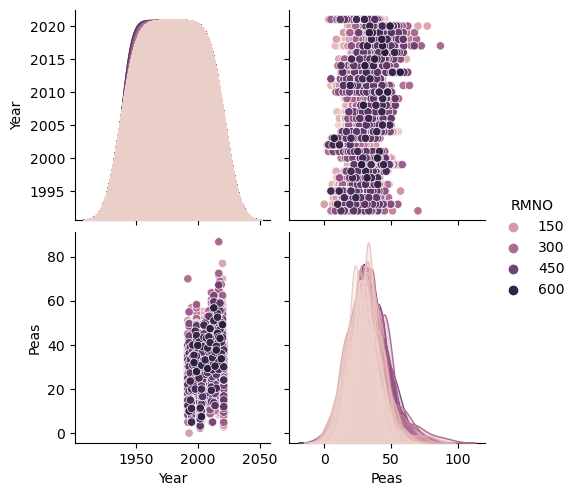

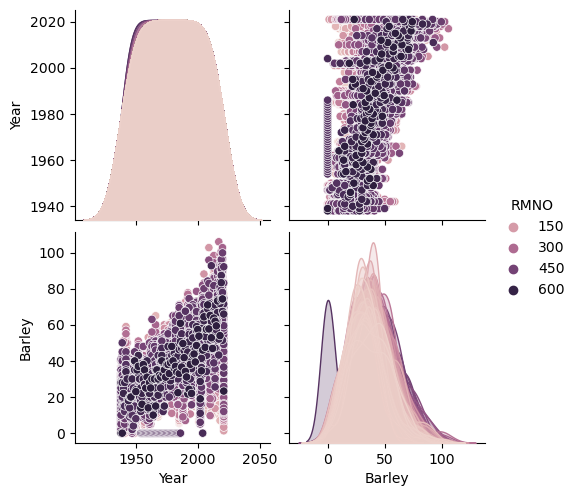

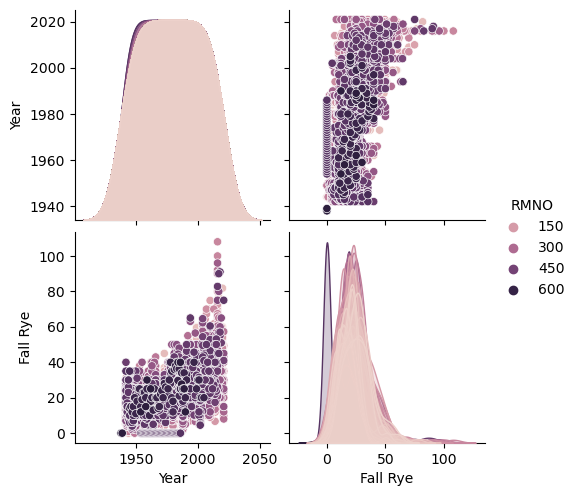

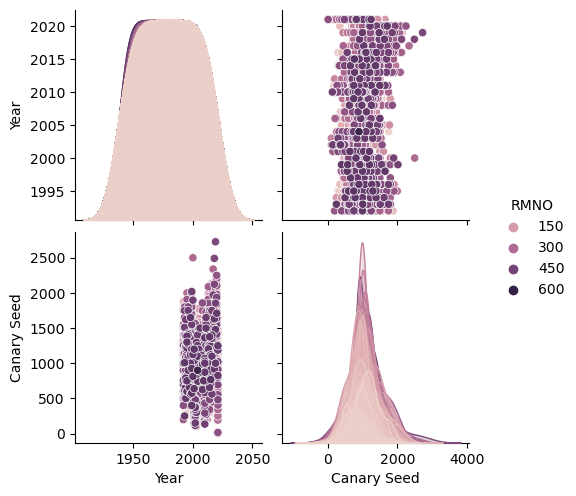

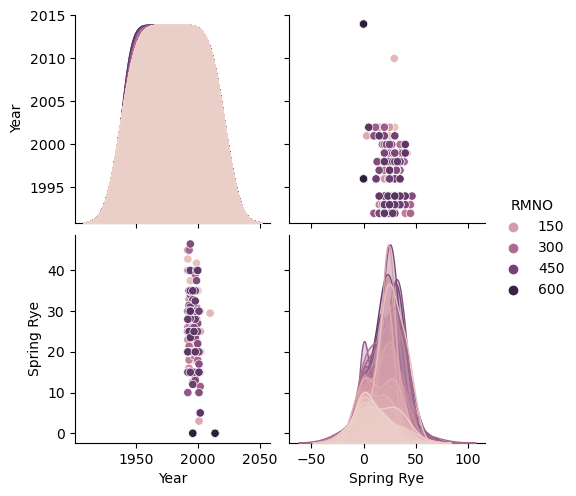

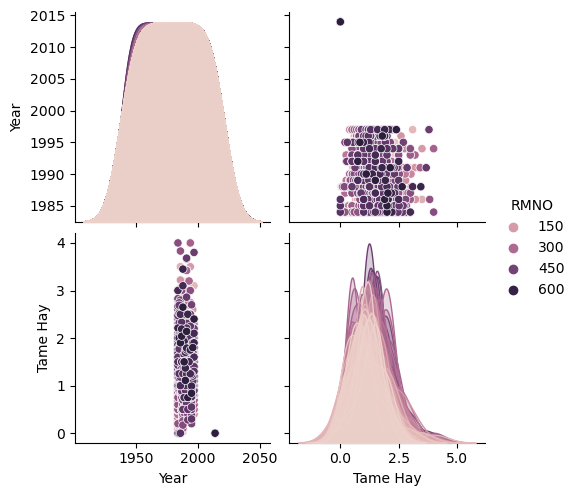

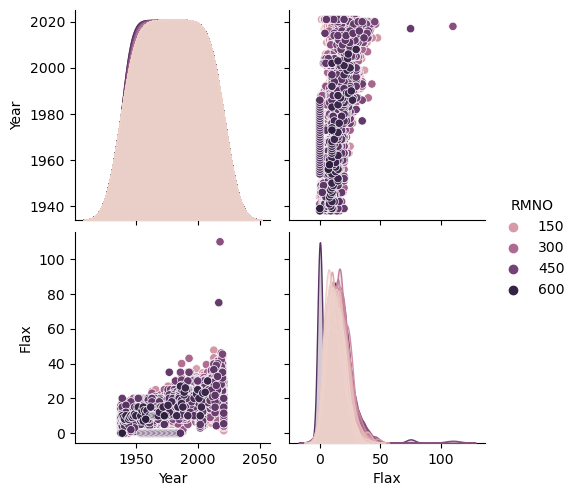

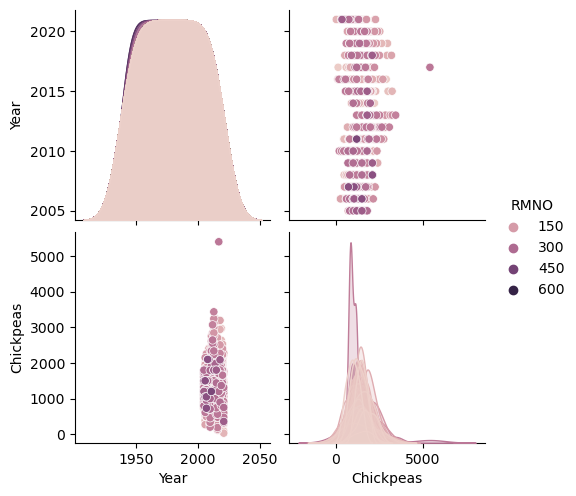

In [15]:
for col in cropCols:
    sns.pairplot(data = data[['Year', 'RMNO', col]], hue='RMNO')

In [16]:
for col in data.columns:
    if data[col].dtype == 'float64':
        data[col].fillna(0, inplace = True)

In [17]:
data.groupby(by='Year', as_index=False).sum()

,Year,RMNO,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1938,74689,0.00,0.00,2541.00,0.00,0.00,0.0,5914.00,0.00,0.0,4580.00,0.00,0.00,0.0,0.0,915.00,0.00
1,1939,74689,0.00,0.00,4938.00,0.00,0.00,0.0,7569.00,0.00,0.0,5969.00,0.00,0.00,0.0,0.0,1576.00,0.00
2,1940,74689,0.00,0.00,4300.00,0.00,0.00,0.0,7243.00,0.00,0.0,5653.00,0.00,0.00,0.0,0.0,1654.00,0.00
3,1941,74689,0.00,0.00,3350.00,0.00,0.00,0.0,5598.00,0.00,0.0,4510.00,0.00,0.00,0.0,0.0,1662.00,0.00
4,1942,74689,0.00,0.00,7491.00,0.00,0.00,0.0,14129.00,0.00,0.0,10518.00,4391.00,0.00,0.0,0.0,2591.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2017,72953,3482.78,9838.74,12487.59,53879.05,6504.52,0.0,15797.42,291341.11,10222.0,16237.15,1796.07,95957.65,0.0,0.0,4477.73,54421.76
80,2018,72953,1990.00,10672.80,13042.90,44802.00,6578.30,0.0,16133.70,270659.00,10526.0,16866.10,1318.00,79463.00,0.0,0.0,4181.30,117200.00
81,2019,72953,1645.20,11827.10,14177.50,35700.00,7304.10,0.0,19582.60,257523.00,11246.6,19754.20,1423.20,78517.00,0.0,0.0,4952.30,103749.00
82,2020,72953,1578.40,11088.00,14140.80,35248.00,8320.90,0.0,19247.80,329838.00,11404.9,19541.80,1399.40,113155.00,0.0,0.0,5532.70,97056.00


In [18]:
data.groupby(by="RMNO", as_index=False).sum()

,RMNO,Year,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
0,1,166278,987.74,1141.25,2004.79,12142.32,837.28,22240.6,3834.17,5416.00,942.5,3104.64,2066.88,6748.00,0.0,17.76,990.69,0.0
1,2,166278,1071.35,1231.35,2131.45,15478.05,1330.98,18571.1,3930.55,13289.15,938.4,3171.45,1863.13,11665.90,0.0,18.60,1110.78,0.0
2,3,166278,990.53,1178.63,2136.15,18923.30,1585.73,4961.0,3847.87,29272.72,871.6,3301.84,1889.35,24564.46,20.0,17.14,1094.23,14549.0
3,4,166278,411.53,1020.25,1930.71,14225.78,1405.71,5931.0,3272.19,16270.48,756.7,2750.79,1277.41,9336.62,0.0,18.43,1016.35,0.0
4,5,166278,431.17,900.84,1799.02,16161.28,1409.35,7250.0,2841.30,24055.67,751.1,2727.35,1062.20,6432.07,0.0,13.71,953.94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,529,106083,0.00,355.20,933.60,0.00,0.00,0.0,1769.50,0.00,0.0,1307.10,380.00,0.00,0.0,11.24,7.00,0.0
295,555,164269,0.00,976.22,1631.05,0.00,0.00,0.0,3375.24,0.00,141.3,2065.69,179.00,0.00,0.0,16.73,142.00,0.0
296,561,166278,0.00,1233.86,2251.76,0.00,11.00,0.0,3463.09,2530.00,731.9,2736.50,327.00,0.00,0.0,26.07,90.00,0.0
297,588,166278,397.95,1366.39,2541.91,1250.00,521.20,900.0,4600.79,10077.00,1002.9,3425.59,1247.40,900.00,0.0,26.09,657.60,0.0


In [19]:
gdf = gpd.read_file('RuralMunicipality/Rural Municipality.shp')

In [20]:
gdata = gdf.copy()

In [21]:
gdata.head()

,PPID,EFFDT,EXPDT,FEATURECD,RMNO,RMNM,SHAPE_AREA,SHAPE_LEN,geometry
0,0101000095,2019-01-21,None,RMPPID,095,GOLDEN WEST,8.101431e+08,265851.388799,"POLYGON ((654081.000 5546088.320, 654885.320 5..."
1,0101000378,2019-07-29,None,RMPPID,378,ROSEMOUNT,5.844701e+08,161271.937167,"POLYGON ((265258.740 5810148.180, 266062.740 5..."
2,0101000288,2015-01-27,None,RMPPID,288,PLEASANT VALLEY,8.532007e+08,116895.097209,"POLYGON ((254141.490 5701256.420, 254179.510 5..."
3,0101000106,2019-04-24,None,RMPPID,106,WHISKA CREEK,8.526283e+08,129288.281136,"POLYGON ((339874.810 5539057.770, 339849.430 5..."
4,0101000132,2019-07-16,None,RMPPID,132,HILLSBOROUGH,6.343913e+08,103052.690196,"POLYGON ((445175.620 5573313.600, 445572.880 5..."


In [22]:
gdata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PPID        298 non-null    object  
 1   EFFDT       298 non-null    object  
 2   EXPDT       0 non-null      object  
 3   FEATURECD   298 non-null    object  
 4   RMNO        298 non-null    object  
 5   RMNM        298 non-null    object  
 6   SHAPE_AREA  298 non-null    float64 
 7   SHAPE_LEN   298 non-null    float64 
 8   geometry    298 non-null    geometry
dtypes: float64(2), geometry(1), object(6)
memory usage: 21.1+ KB


In [23]:
gdata['RMNO']=gdata['RMNO'].astype('int64')
gdata['RMNM']=gdata['RMNM'].astype('string')

In [24]:
gdata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PPID        298 non-null    object  
 1   EFFDT       298 non-null    object  
 2   EXPDT       0 non-null      object  
 3   FEATURECD   298 non-null    object  
 4   RMNO        298 non-null    int64   
 5   RMNM        298 non-null    string  
 6   SHAPE_AREA  298 non-null    float64 
 7   SHAPE_LEN   298 non-null    float64 
 8   geometry    298 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(4), string(1)
memory usage: 21.1+ KB


In [25]:
gdata.nunique()

PPID          298
EFFDT         200
EXPDT           0
FEATURECD       1
RMNO          298
RMNM          297
SHAPE_AREA    298
SHAPE_LEN     298
geometry      298
dtype: int64

In [26]:
gdata[gdata['RMNM'].duplicated()]

,PPID,EFFDT,EXPDT,FEATURECD,RMNO,RMNM,SHAPE_AREA,SHAPE_LEN,geometry
201,0101000998,2022-08-17,None,RMPPID,998,NORTHERN ADMIN DISTRICT,1.455184e+11,4.367275e+06,"MULTIPOLYGON (((443384.000 6596155.000, 442966..."


In [ ]:
gdata.explore(
    column='SHAPE_AREA',
    cmap='inferno'
)

# EDA(Explarotary Data Analysis)

In [28]:
merged_data = pd.merge(data, gdata, on=['RMNO'], how='inner')
merged_data

,Year,RMNO,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,...,Flax,Chickpeas,PPID,EFFDT,EXPDT,FEATURECD,RMNM,SHAPE_AREA,SHAPE_LEN,geometry
0,1938,1,0.0,0.00,4.00,0.0,0.0,0.0,1.00,0.0,...,0.0,0.0,0101000001,2020-04-21,None,RMPPID,ARGYLE,5.833390e+08,110967.010404,"POLYGON ((762879.770 5454341.780, 762914.620 5..."
1,1939,1,0.0,0.00,9.00,0.0,0.0,0.0,16.00,0.0,...,0.0,0.0,0101000001,2020-04-21,None,RMPPID,ARGYLE,5.833390e+08,110967.010404,"POLYGON ((762879.770 5454341.780, 762914.620 5..."
2,1940,1,0.0,0.00,12.00,0.0,0.0,0.0,23.00,0.0,...,8.0,0.0,0101000001,2020-04-21,None,RMPPID,ARGYLE,5.833390e+08,110967.010404,"POLYGON ((762879.770 5454341.780, 762914.620 5..."
3,1941,1,0.0,0.00,18.00,0.0,0.0,0.0,32.00,0.0,...,5.0,0.0,0101000001,2020-04-21,None,RMPPID,ARGYLE,5.833390e+08,110967.010404,"POLYGON ((762879.770 5454341.780, 762914.620 5..."
4,1942,1,0.0,0.00,20.00,0.0,0.0,0.0,35.00,0.0,...,5.0,0.0,0101000001,2020-04-21,None,RMPPID,ARGYLE,5.833390e+08,110967.010404,"POLYGON ((762879.770 5454341.780, 762914.620 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24826,2017,622,0.0,43.06,59.49,0.0,0.0,0.0,93.01,0.0,...,0.0,0.0,0101000622,2022-12-12,None,RMPPID,BEAVER RIVER,1.619619e+09,903042.994254,"MULTIPOLYGON (((191722.688 6047138.574, 191759..."
24827,2018,622,0.0,39.30,59.50,0.0,0.0,0.0,96.40,0.0,...,0.0,0.0,0101000622,2022-12-12,None,RMPPID,BEAVER RIVER,1.619619e+09,903042.994254,"MULTIPOLYGON (((191722.688 6047138.574, 191759..."
24828,2019,622,0.0,46.10,63.90,0.0,0.0,0.0,106.00,0.0,...,0.0,0.0,0101000622,2022-12-12,None,RMPPID,BEAVER RIVER,1.619619e+09,903042.994254,"MULTIPOLYGON (((191722.688 6047138.574, 191759..."
24829,2020,622,0.0,40.90,55.10,0.0,0.0,0.0,94.50,0.0,...,0.0,0.0,0101000622,2022-12-12,None,RMPPID,BEAVER RIVER,1.619619e+09,903042.994254,"MULTIPOLYGON (((191722.688 6047138.574, 191759..."


In [29]:
merged_gdata = gpd.GeoDataFrame(merged_data[merged_data['Winter Wheat'].notna()][['Year', 'RMNM', 'Winter Wheat', 'geometry']])
merged_gdata

,Year,RMNM,Winter Wheat,geometry
0,1938,ARGYLE,0.0,"POLYGON ((762879.770 5454341.780, 762914.620 5..."
1,1939,ARGYLE,0.0,"POLYGON ((762879.770 5454341.780, 762914.620 5..."
2,1940,ARGYLE,0.0,"POLYGON ((762879.770 5454341.780, 762914.620 5..."
3,1941,ARGYLE,0.0,"POLYGON ((762879.770 5454341.780, 762914.620 5..."
4,1942,ARGYLE,0.0,"POLYGON ((762879.770 5454341.780, 762914.620 5..."
...,...,...,...,...
24826,2017,BEAVER RIVER,0.0,"MULTIPOLYGON (((191722.688 6047138.574, 191759..."
24827,2018,BEAVER RIVER,0.0,"MULTIPOLYGON (((191722.688 6047138.574, 191759..."
24828,2019,BEAVER RIVER,0.0,"MULTIPOLYGON (((191722.688 6047138.574, 191759..."
24829,2020,BEAVER RIVER,0.0,"MULTIPOLYGON (((191722.688 6047138.574, 191759..."
